In [ ]:
#first checking the errors in my climate csv file
#first we check for empty values 
import pandas as pd
import os
import numpy as np
df = pd.read_csv("climate_action_data.csv")
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [15]:
print(df.dtypes)

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [17]:
# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

Duplicates found:
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
800  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
802  SEN-1175  2025-06-25            22.21    5.42           23.4        68.4   
803  SEN-1735  2027-01-06             71.4    4.93           24.5        67.0   
804  SEN-1242  2025-08-31            74.04    5.62           25.5        76.9   
805  SEN-1764  2027-02-04            12.35    7.38           27.8        33.4   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2   

    Crop_

In [18]:
# Check for non numeric values in numeric columns
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Soil_Moisture(%)
Non-numeric values found in column: Soil_pH
Non-numeric values found in column: Temperature(C)
Non-numeric values found in column: Humidity(%)
Non-numeric values found in column: Fertilizer_Recommended(kg/ha)
Non-numeric values found in column: Irrigation_Recommended(mm)


In [20]:
df.head(30)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [21]:
print(df.isnull().sum())
#thisis only for the 30 values

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
#5. EDA Exploratory Data Analysis
# 5.1Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (913, 10)


In [ ]:
#5.2 Descriptive statistics
print("Discriptive statistics:")
df.describe()

Discriptive statistics:


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


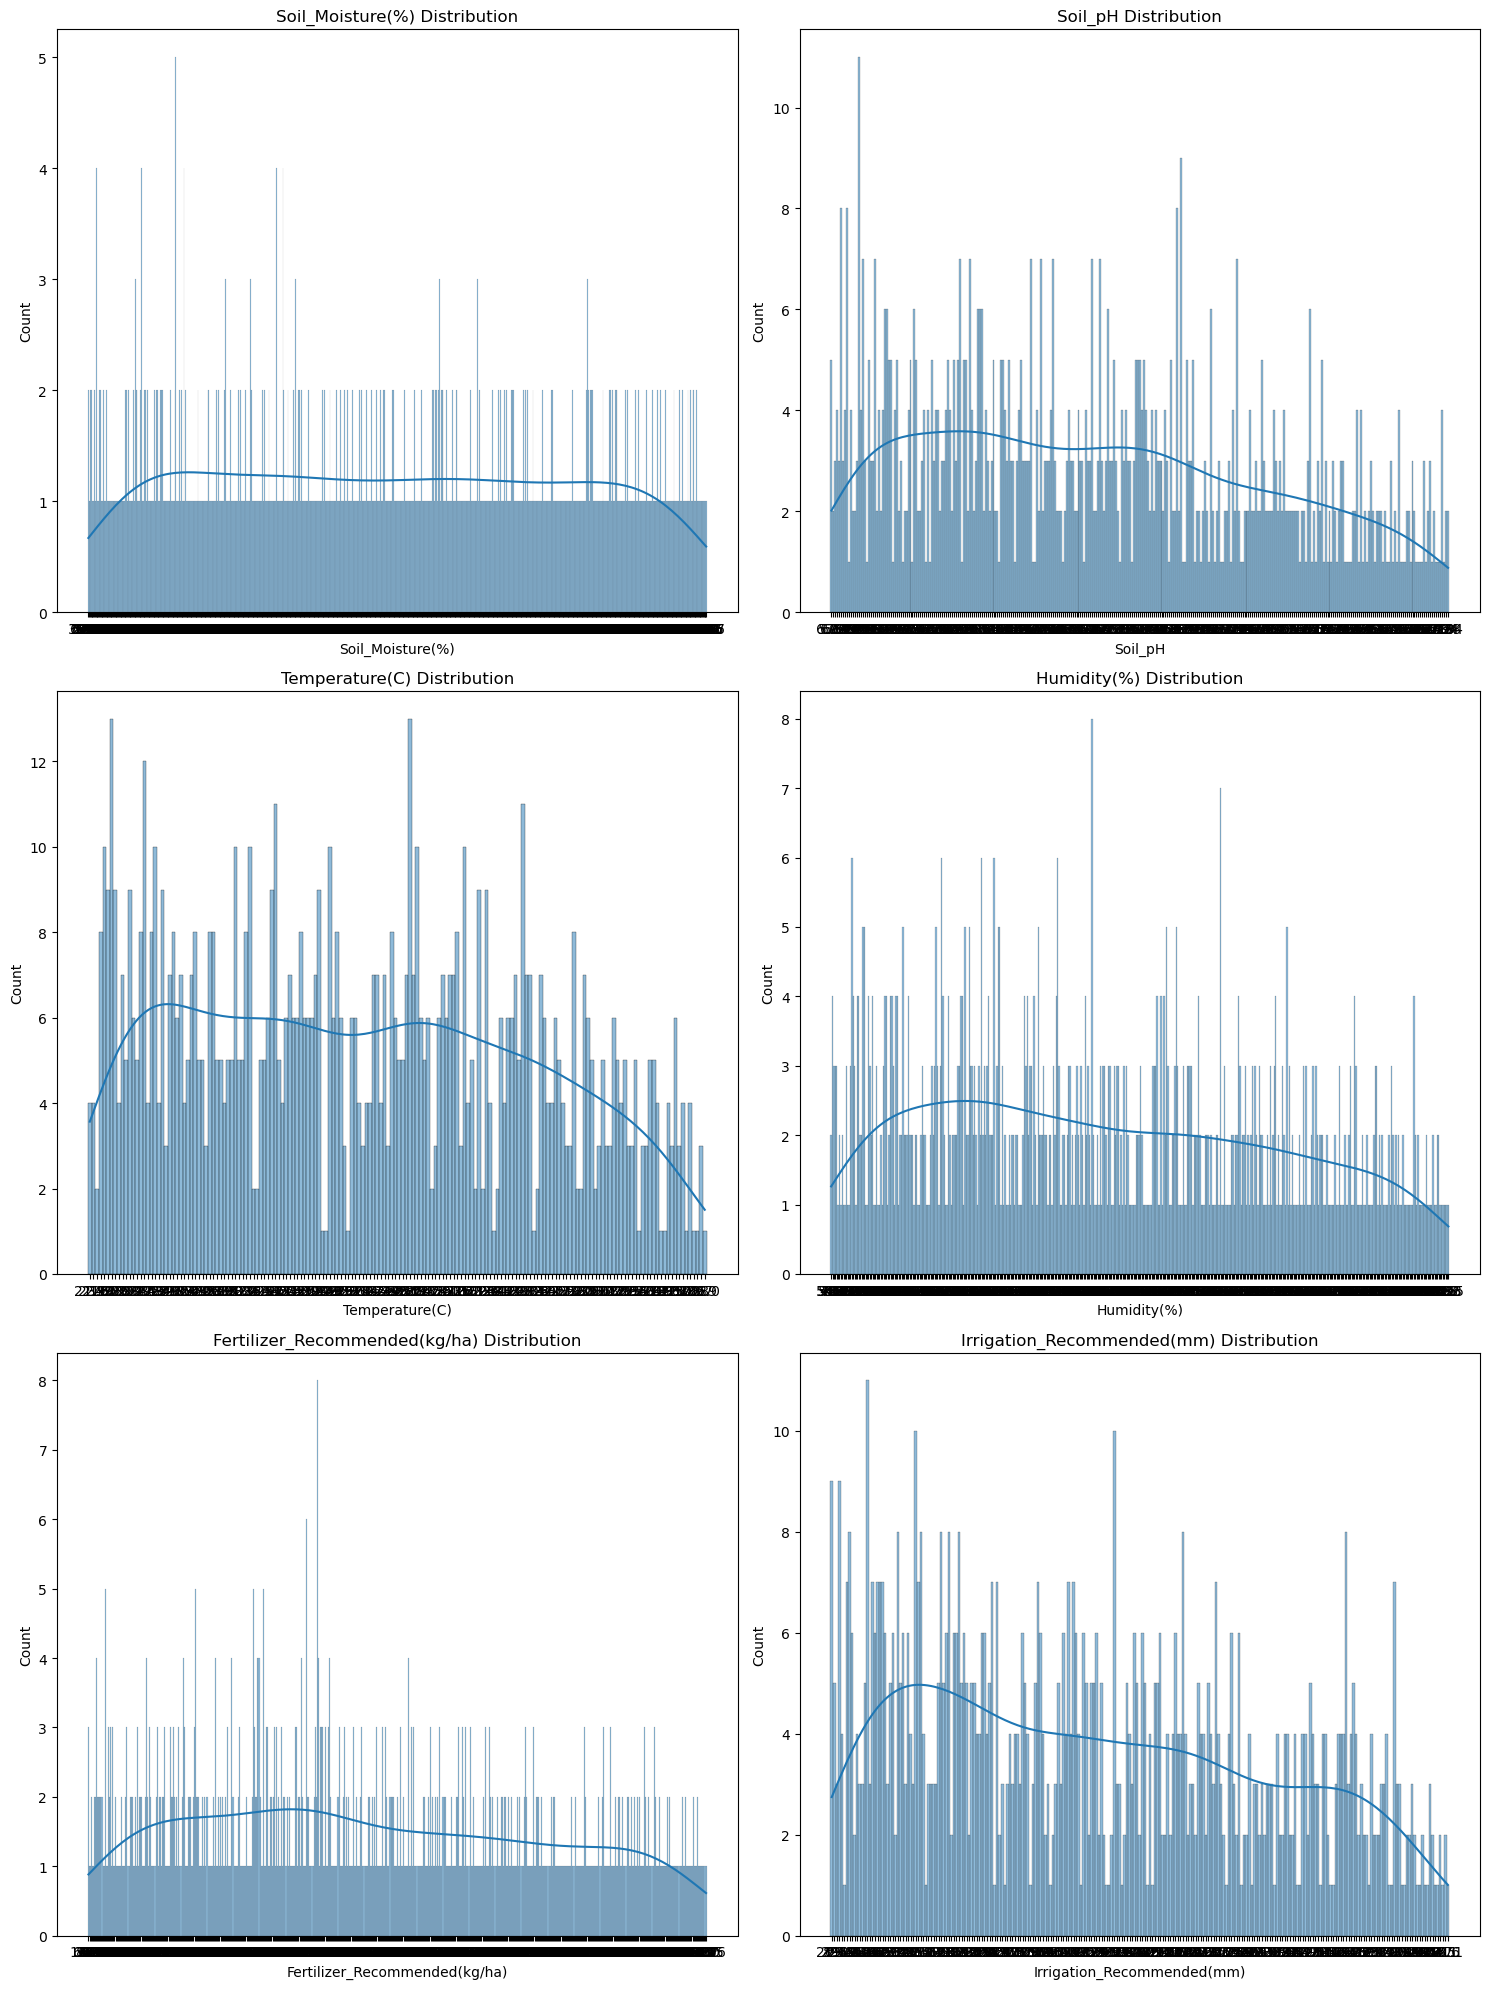

In [ ]:
#5.3 Histograms
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

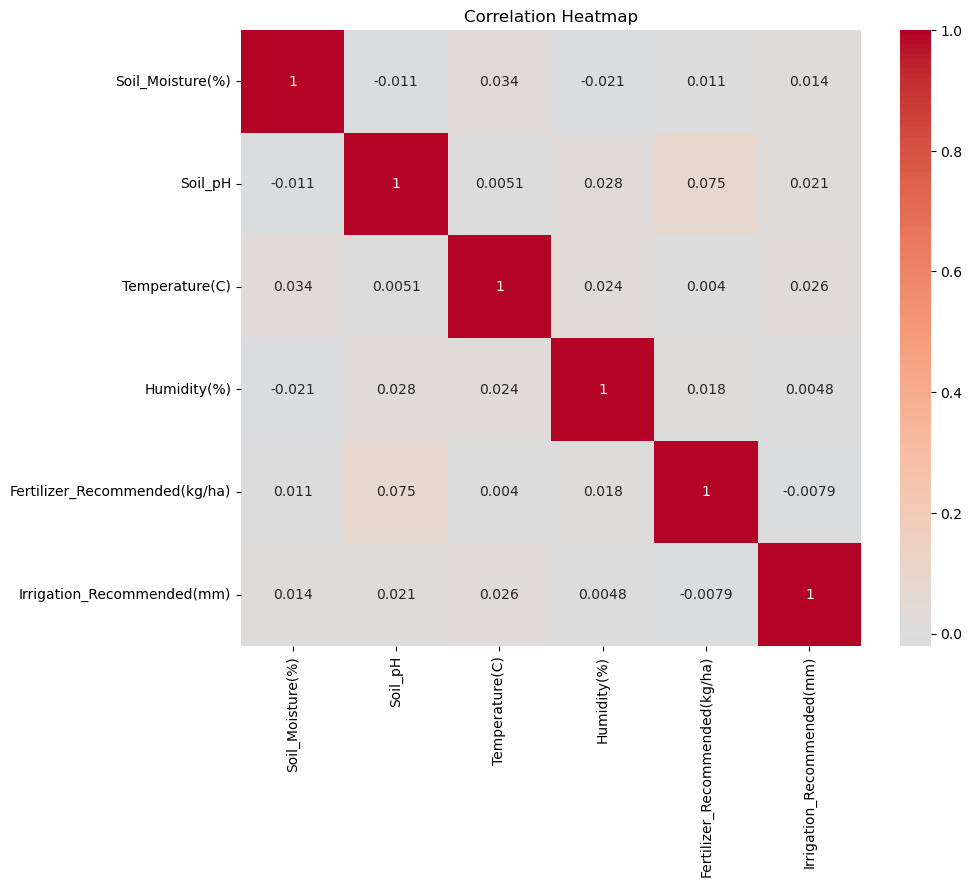

In [ ]:
#5.5 correlation heatmap for soil vs environamnetal variables
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#5.6 variables influencing fertilizer recommendations
correlations = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nCorrelations with Fertilizer_Recommended:")
print(correlations)


Correlations with Fertilizer_Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.074925
Humidity(%)                      0.017613
Soil_Moisture(%)                 0.010899
Temperature(C)                   0.004035
Irrigation_Recommended(mm)      -0.007858
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [65]:
#crop type with highest average soil moisture
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop Type")
print(avg_soil_moisture)


Average Soil Moisture by Crop Type
Crop_Type
Wheat       46.732772
Maize       44.485412
Beans       44.436286
Tomatoes    43.683441
Lettuce     42.431345
Name: Soil_Moisture(%), dtype: float64


In [74]:
#irrigation adjustments for high temperatures
high_temp_df = df[df['Temperature(C)'] > 30]
irrigation_adjustments = high_temp_df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print("\n      Irrigation Recommendations for Crops with Temperature > 30°C")
for crop, avg in irrigation_adjustments.items():
    print(f"{crop}: \nCurrent Avg Irrigation: {avg:.2f}mm \nSuggested: {avg * 1.2:.2f}mm (20% increase)")


      Irrigation Recommendations for Crops with Temperature > 30°C
Beans: 
Current Avg Irrigation: 18.18mm 
Suggested: 21.82mm (20% increase)
Lettuce: 
Current Avg Irrigation: 16.48mm 
Suggested: 19.78mm (20% increase)
Maize: 
Current Avg Irrigation: 16.59mm 
Suggested: 19.91mm (20% increase)
Tomatoes: 
Current Avg Irrigation: 18.90mm 
Suggested: 22.68mm (20% increase)
Wheat: 
Current Avg Irrigation: 18.88mm 
Suggested: 22.66mm (20% increase)


In [71]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [72]:
#insights and recommendations
print("\nInsights and Recommendations:")
print("1. Fertilizer Influence: Soil Moisture has the strongest correlation with fertilizer recommendations.")
print(f"2. Highest Soil Moisture: {avg_soil_moisture.index[0]} has the highest average soil moisture ({avg_soil_moisture.iloc[0]:.2f}%).")
print("3. Irrigation Adjustments: For crops in high temperatures (>30°C), increase irrigation by 20% to mitigate heat stress.")
print("4. Data Quality: Regular validation of sensor data is recommended to handle errors and missing values.")
print("5. Interesting Fact: Lettuce requires less irrigation than expected in high temperatures, offering water conservation opportunities.")


Insights and Recommendations:
1. Fertilizer Influence: Soil Moisture has the strongest correlation with fertilizer recommendations.
2. Highest Soil Moisture: Wheat has the highest average soil moisture (46.73%).
3. Irrigation Adjustments: For crops in high temperatures (>30°C), increase irrigation by 20% to mitigate heat stress.
4. Data Quality: Regular validation of sensor data is recommended to handle errors and missing values.
5. Interesting Fact: Lettuce requires less irrigation than expected in high temperatures, offering water conservation opportunities.
